In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [4]:
raw_data = pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
raw_data['sex'] = raw_data['sex'].map({'male': 1,'female': 0})
raw_data['smoker'] = raw_data['smoker'].map({'yes':1,'no':0})

In [13]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338,1338.000000
unique,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.207025,0.505232,30.663397,1.094918,0.204783,NaN,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,NaN,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,NaN,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,NaN,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,NaN,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,NaN,16639.912515


In [15]:
data = raw_data.drop(['region'], axis=1)
data.describe(include='all')

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [17]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


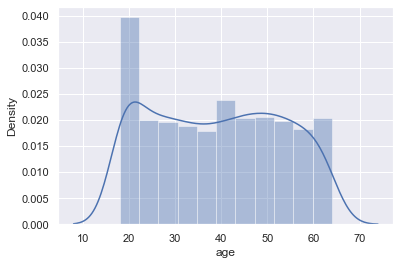

In [18]:
sns.distplot(data['age'])

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


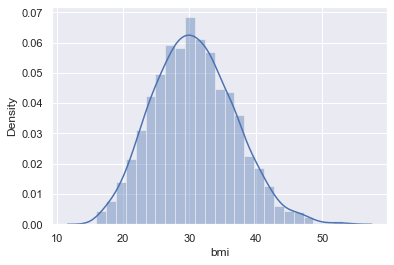

In [19]:
sns.distplot(data['bmi'])

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


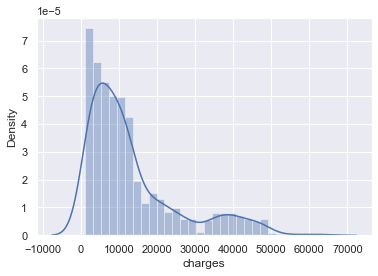

In [21]:
sns.distplot(data['charges'])

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


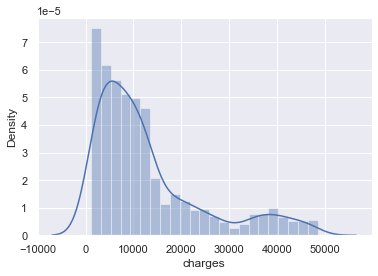

In [27]:
q = data['charges'].quantile(0.99)
data_1 = data[data['charges'] < q]
sns.distplot(data_1['charges'])

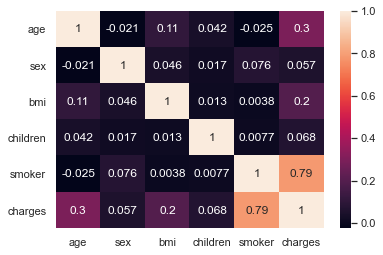

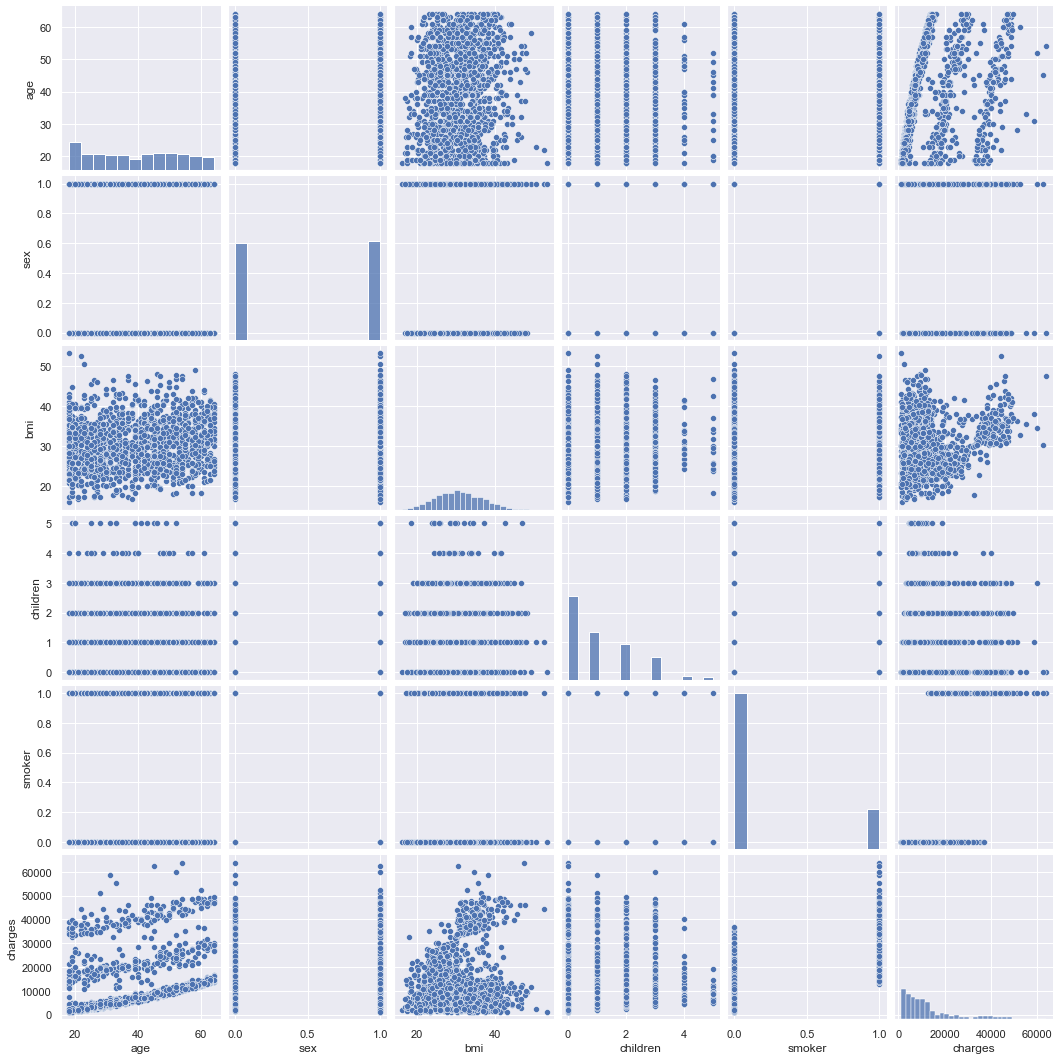

In [39]:
data_corr = data.corr()
sns.heatmap(data_corr, annot = True)
sns.pairplot(data)

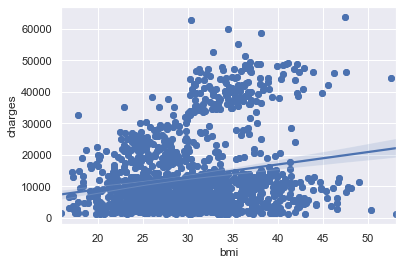

In [43]:
plt.scatter(data['bmi'],data['charges'])
sns.regplot(x = data['bmi'],y = data['charges'])

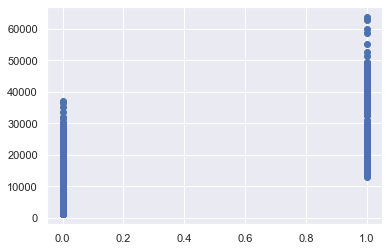

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


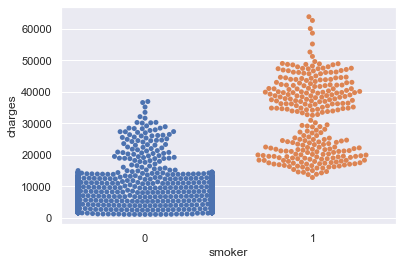

In [45]:
plt.scatter(data['smoker'],data['charges'])
plt.show()
sns.swarmplot(x = data['smoker'], y = data['charges'])


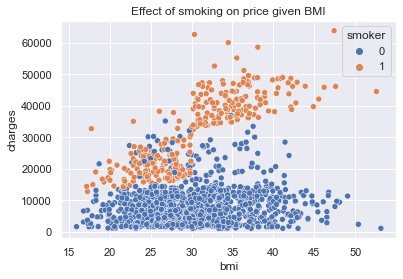

In [47]:
plt.title('Effect of smoking on price given BMI')
sns.scatterplot(x = data['bmi'], y = data['charges'], hue = data['smoker'])

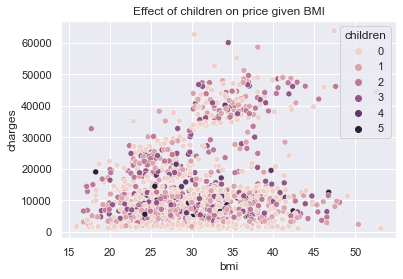

In [48]:
plt.title('Effect of children on price given BMI')
sns.scatterplot(x = data['bmi'], y = data['charges'], hue = data['children'])

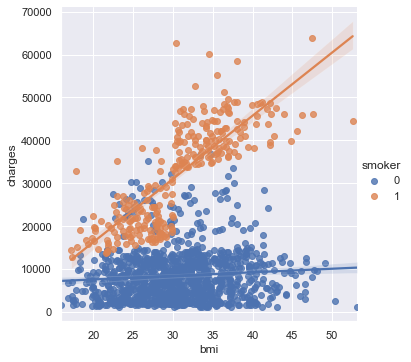

In [53]:
sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker' , data=data)

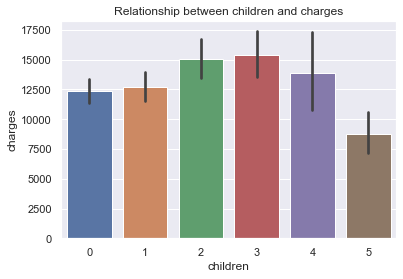

In [54]:
plt.title('Relationship between children and charges')
sns.barplot(x=data['children'],y=data['charges'])

c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dhruv kanetkar\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


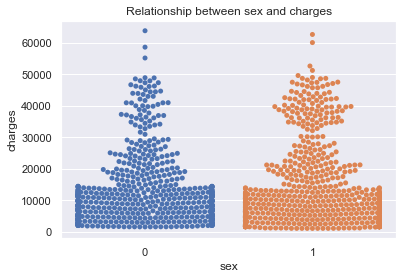

In [55]:
plt.title('Relationship between sex and charges')
sns.swarmplot(x=data['sex'],y=data['charges'])

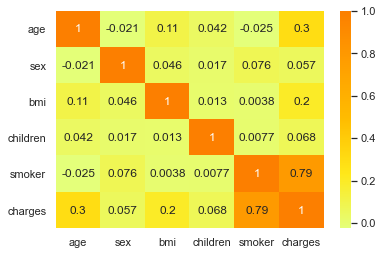

In [56]:
sns.heatmap(data.corr() , cmap = 'Wistia' , annot = True)

In [58]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [64]:
data.describe(include='all')
data_cleaned = data.drop(['sex'],axis=1)
data_cleaned.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


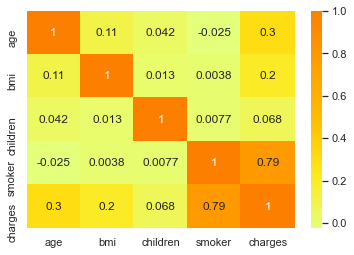

In [65]:
sns.heatmap(data_cleaned.corr() , cmap = 'Wistia' , annot = True)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 51)

In [81]:
print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (1070, 4)
 Shape of x_test =  (268, 4)
 Shape of y_train =  (1070,)
 Shape of y_test =  (268,)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [83]:
x_train

array([[-0.01679025, -1.10886921,  3.22869711, -0.50145986],
       [ 1.46855153,  1.53991862, -0.90867523,  1.99417757],
       [-0.93628753, -0.5478814 ,  1.57374817, -0.50145986],
       ...,
       [-0.58263473,  0.08002838, -0.90867523, -0.50145986],
       [-1.50213202,  0.18165062,  0.7462737 ,  1.99417757],
       [ 0.54905424,  0.90870405, -0.08120077,  1.99417757]])

In [84]:
x_test

array([[ 0.6197848 , -0.14552342, -0.90867523, -0.50145986],
       [ 1.46855153,  0.36671877, -0.90867523,  1.99417757],
       [-1.07774866, -0.47269746, -0.90867523, -0.50145986],
       ...,
       [-1.43140146, -0.05464174, -0.90867523,  1.99417757],
       [ 1.61001265,  0.23700583, -0.90867523,  1.99417757],
       [ 1.18562929,  0.28409906,  1.57374817, -0.50145986]])

In [86]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [87]:
reg.coef_

array([3485.7116325 , 1828.54669613,  589.40838251, 9491.36662592])

In [88]:
reg.intercept_

13128.763458176636

In [91]:
y_pred = reg.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Values'])
y_test_df = pd.DataFrame(np.array(y_test), columns=['Actual Values'])
pd.concat([y_pred_df , y_test_df], axis=1)

,Predicted Values,Actual Values
0,9727.938031,7789.63500
1,37310.162649,52590.82939
2,3212.572898,2464.61880
3,10742.906656,8964.06055
4,33415.027043,39556.49450
...,...,...
263,11727.054002,6610.10970
264,27537.114950,18648.42170
265,26431.285413,32548.34050
266,37566.069155,45710.20785


In [94]:
reg.score(x_test,y_test)

0.7493620208102444

In [95]:
# Let's use the handy function we created
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [96]:
adj_r2(x_train,y_train)

0.7482542604987668